In [2]:
import numpy as np
import pandas as pd

In [3]:
math_data = pd.read_csv(r'C:/Users/aze/Desktop/prjt analysed/student-mat.csv', sep=';')
portuguese_data = pd.read_csv(r'C:/Users/aze/Desktop/prjt analysed/student-por.csv', sep=';')


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/aze/Desktop/prjt analysed/student-mat.csv'

In [ ]:
math_data

In [ ]:
portuguese_data

# Prétraitement 

In [ ]:
print(f"Dimensions du dataset math: {math_data.shape}")
print(f"Dimensions du dataset portugais: {portuguese_data.shape}")


###  Fusion des datasets

In [4]:
df= pd.merge(math_data, portuguese_data, 
              on=["school", "sex", "age", "address", "famsize", "Pstatus", 
                  "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"])

NameError: name 'math_data' is not defined

In [5]:
print(f"Nombre d'étudiants communs: {len(df)}") 


NameError: name 'df' is not defined

In [164]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
378,MS,F,18,U,GT3,T,1,1,other,other,...,3,4,4,2,2,5,3,7,8,7
379,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
380,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [165]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_x', 'traveltime_x', 'studytime_x',
       'failures_x', 'schoolsup_x', 'famsup_x', 'paid_x', 'activities_x',
       'nursery', 'higher_x', 'internet', 'romantic_x', 'famrel_x',
       'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x',
       'G1_x', 'G2_x', 'G3_x', 'guardian_y', 'traveltime_y', 'studytime_y',
       'failures_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y',
       'Walc_y', 'health_y', 'absences_y', 'G1_y', 'G2_y', 'G3_y'],
      dtype='object')

In [166]:
# Obtenir les colonnes avec suffixes _x et _y
x_cols = [col for col in df.columns if col.endswith('_x')]
y_cols = [col for col in df.columns if col.endswith('_y')]

common_cols = [col[:-2] for col in x_cols if col[:-2] + '_y' in df.columns]

print("Colonnes dupliquées (paire _x/_y) détectées :")
for col in common_cols:
    print(f"- {col}_x & {col}_y")


Colonnes dupliquées (paire _x/_y) détectées :
- guardian_x & guardian_y
- traveltime_x & traveltime_y
- studytime_x & studytime_y
- failures_x & failures_y
- schoolsup_x & schoolsup_y
- famsup_x & famsup_y
- paid_x & paid_y
- activities_x & activities_y
- higher_x & higher_y
- romantic_x & romantic_y
- famrel_x & famrel_y
- freetime_x & freetime_y
- goout_x & goout_y
- Dalc_x & Dalc_y
- Walc_x & Walc_y
- health_x & health_y
- absences_x & absences_y
- G1_x & G1_y
- G2_x & G2_y
- G3_x & G3_y


### Stratégies pouùr résoudre le problème des colonnes dupliquées

***
Colonnes très similaires (> 90%)
Conserver une seule version (ex. guardian_x) et supprimer l'autre (guardian_y).
Colonnes concernées : guardian, traveltime, studytime, schoolsup, famsup, activities, higher, romantic, famrel, freetime, goout, Dalc, Walc, health.

Colonnes moyennement cohérentes (60% < cohérence < 90%)
Garder les deux si nécessaire, sinon ne conserver qu'une seule.

Exemple : failures (86%) → garder failures_x.

paid (55%) → utile de conserver les deux pour comparer les cours.

Colonnes très divergentes (< 50%)
Garder les deux ou analyser individuellement.

Exemple : absences (26,7%) → conserver séparément (absences_math, absences_por).

Colonnes de notes (G1, G2, G3)
Garder les deux versions et les renommer par matière (ex. G1_math, G1_por).
***

In [1]:
# 6. Identifier les colonnes dupliquées avec suffixes _math et _por
math_cols = [col for col in df.columns if col.endswith('_x')]
por_cols = [col for col in df.columns if col.endswith('_y')]
common_prefix = [col[:-2] for col in math_cols if col[:-2] + '_y' in df.columns]
common_prefix

NameError: name 'df' is not defined

In [168]:
print("\nVérification de la cohérence des colonnes dupliquées...")
consistency_check = {}

for col in common_prefix:
    # Exclure les notes qui sont naturellement différentes
    if col not in ['G1', 'G2', 'G3']:  
        math_col = f"{col}_x"
        por_col = f"{col}_y"
        # Calculer le pourcentage de valeurs identiques
        identical = (df[math_col] == df[por_col]).mean() * 100
        consistency_check[col] = identical
        print(f"- {col}: {identical:.2f}% des valeurs sont identiques entre math et portugais")



Vérification de la cohérence des colonnes dupliquées...
- guardian: 98.43% des valeurs sont identiques entre math et portugais
- traveltime: 98.69% des valeurs sont identiques entre math et portugais
- studytime: 97.64% des valeurs sont identiques entre math et portugais
- failures: 86.13% des valeurs sont identiques entre math et portugais
- schoolsup: 99.21% des valeurs sont identiques entre math et portugais
- famsup: 98.69% des valeurs sont identiques entre math et portugais
- paid: 55.24% des valeurs sont identiques entre math et portugais
- activities: 98.69% des valeurs sont identiques entre math et portugais
- higher: 98.95% des valeurs sont identiques entre math et portugais
- romantic: 98.43% des valeurs sont identiques entre math et portugais
- famrel: 97.38% des valeurs sont identiques entre math et portugais
- freetime: 97.12% des valeurs sont identiques entre math et portugais
- goout: 97.38% des valeurs sont identiques entre math et portugais
- Dalc: 98.69% des valeurs 

In [169]:
cols_to_drop = [
    'guardian_y', 'traveltime_y', 'studytime_y', 'schoolsup_y', 'famsup_y',
    'activities_y', 'higher_y', 'romantic_y', 'famrel_y', 'freetime_y',
    'goout_y', 'Dalc_y', 'Walc_y', 'health_y'
]
df.drop(columns=cols_to_drop, inplace=True)


In [170]:
df.rename(columns={col: col[:-2] for col in df.columns if col.endswith('_x')}, inplace=True)


In [171]:
df.rename(columns={
    'paid_x': 'paid_math', 'paid_y': 'paid_por',
    'failures_x': 'failures_math', 'failures_y': 'failures_por',
    'absences_x': 'absences_math', 'absences_y': 'absences_por',
    'G1_x': 'G1_math', 'G2_x': 'G2_math', 'G3_x': 'G3_math',
    'G1_y': 'G1_por', 'G2_y': 'G2_por', 'G3_y': 'G3_por',
}, inplace=True)


In [172]:
print(df.columns.tolist())

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'failures_por', 'paid_por', 'absences_por', 'G1_por', 'G2_por', 'G3_por']


### Vérifier les valeurs manquantes

In [173]:
df.isnull().sum().sort_values(ascending=False)


school          0
absences        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
G1              0
higher          0
G2              0
G3              0
failures_por    0
paid_por        0
absences_por    0
G1_por          0
G2_por          0
internet        0
nursery         0
sex             0
Fjob            0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
reason          0
activities      0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
G3_por          0
dtype: int64

### Nettoyage des types de données

In [174]:
df.dtypes


school          object
sex             object
age              int64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1               int64
G2               int64
G3               int64
failures_por     int64
paid_por        object
absences_por     int64
G1_por           int64
G2_por           int64
G3_por           int64
dtype: object

In [175]:
# Identifier toutes les colonnes catégorielles
cat_cols = df.select_dtypes(include='object').columns

# Standardiser toutes les valeurs : minuscules + suppression des espaces
for col in cat_cols:
    df[col] = df[col].str.lower().str.strip()

# Vérification du résultat
print(df[cat_cols].head())


  school sex address famsize Pstatus     Mjob      Fjob  reason guardian  \
0     gp   f       u     gt3       a  at_home   teacher  course   mother   
1     gp   f       u     gt3       t  at_home     other  course   father   
2     gp   f       u     le3       t  at_home     other   other   mother   
3     gp   f       u     gt3       t   health  services    home   mother   
4     gp   f       u     gt3       t    other     other    home   father   

  schoolsup famsup paid activities nursery higher internet romantic paid_por  
0       yes     no   no         no     yes    yes       no       no       no  
1        no    yes   no         no      no    yes      yes       no       no  
2       yes     no  yes         no     yes    yes      yes       no       no  
3        no    yes  yes        yes     yes    yes      yes      yes       no  
4        no    yes  yes         no     yes    yes       no       no       no  


In [176]:
#!pip install fuzzywuzzy
'''!pip install python-Levenshtein'''

'!pip install python-Levenshtein'

In [177]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Colonnes catégorielles
cat_cols = df.select_dtypes(include='object').columns

# Seuil de similarité
SIMILARITY_THRESHOLD = 90

for col in cat_cols:
    print(f"\nTraitement de la colonne: {col}")
    unique_vals = df[col].dropna().unique()
    replacements = {}

    for val in unique_vals:
        val_clean = val.lower().strip()
        
        # Cas initial : aucun élément encore dans replacements
        if not replacements:
            replacements[val_clean] = val_clean
            continue

        # Sinon, chercher une correspondance
        result = process.extractOne(val_clean, list(replacements.keys()), scorer=fuzz.ratio)
        
        if result is not None:
            best_match, score = result
            if score >= SIMILARITY_THRESHOLD:
                replacements[val_clean] = replacements[best_match]  # Fusion
            else:
                replacements[val_clean] = val_clean  # Nouvelle entrée
        else:
            replacements[val_clean] = val_clean

    # Appliquer la correction
    df[col] = df[col].str.lower().str.strip().map(replacements)

    # Affichage des correspondances trouvées
    print("Valeurs corrigées :", replacements)

# Vérification finale
for col in cat_cols:
    print(f"\n{col}: {df[col].unique()}")



Traitement de la colonne: school
Valeurs corrigées : {'gp': 'gp', 'ms': 'ms'}

Traitement de la colonne: sex
Valeurs corrigées : {'f': 'f', 'm': 'm'}

Traitement de la colonne: address
Valeurs corrigées : {'u': 'u', 'r': 'r'}

Traitement de la colonne: famsize
Valeurs corrigées : {'gt3': 'gt3', 'le3': 'le3'}

Traitement de la colonne: Pstatus
Valeurs corrigées : {'a': 'a', 't': 't'}

Traitement de la colonne: Mjob
Valeurs corrigées : {'at_home': 'at_home', 'health': 'health', 'other': 'other', 'services': 'services', 'teacher': 'teacher'}

Traitement de la colonne: Fjob
Valeurs corrigées : {'teacher': 'teacher', 'other': 'other', 'services': 'services', 'health': 'health', 'at_home': 'at_home'}

Traitement de la colonne: reason
Valeurs corrigées : {'course': 'course', 'other': 'other', 'home': 'home', 'reputation': 'reputation'}

Traitement de la colonne: guardian
Valeurs corrigées : {'mother': 'mother', 'father': 'father', 'other': 'mother'}

Traitement de la colonne: schoolsup
Valeu

## Détection des outliers

In [178]:
#!pip install seaborn 

In [179]:
# Sélection des colonnes numériques
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Détection des valeurs aberrantes avec la méthode IQR
outliers_iqr = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    outliers_iqr[col] = len(outliers)

# Afficher les colonnes avec le plus grand nombre de valeurs aberrantes
sorted(outliers_iqr.items(), key=lambda x: x[1], reverse=True)


[('failures', 66),
 ('failures_por', 34),
 ('studytime', 27),
 ('famrel', 27),
 ('freetime', 18),
 ('Dalc', 17),
 ('absences_por', 17),
 ('age', 13),
 ('absences', 13),
 ('G2', 13),
 ('G3_por', 12),
 ('traveltime', 8),
 ('G2_por', 2),
 ('G1_por', 1),
 ('Medu', 0),
 ('Fedu', 0),
 ('goout', 0),
 ('Walc', 0),
 ('health', 0),
 ('G1', 0),
 ('G3', 0)]

1.	Est-ce que c’est vrai que la consommation d’alcool moyenne est plus élevée chez les  étudiants dont les parents ont un niveau d’instruction modeste ? 

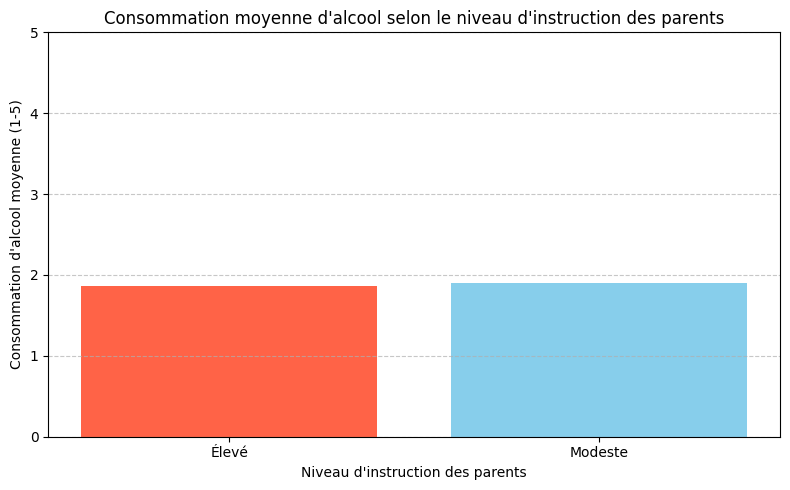

In [180]:
import matplotlib.pyplot as plt
# Calcul du niveau moyen d'éducation des parents
df['edu_mean'] = (df['Medu'] + df['Fedu']) / 2

# Créer une colonne "instruction_modeste"
df['instruction_modeste'] = df['edu_mean'] <= 2

# Calcul de la consommation totale d'alcool
df['alcool_moyenne'] = (df['Dalc'] + df['Walc']) / 2

# Moyenne de la consommation par groupe
resultats = df.groupby('instruction_modeste')['alcool_moyenne'].mean().reset_index()
resultats['instruction_modeste'] = resultats['instruction_modeste'].map({True: 'Modeste', False: 'Élevé'})

# Tracé du graphique
plt.figure(figsize=(8,5))
plt.bar(resultats['instruction_modeste'], resultats['alcool_moyenne'], color=['tomato', 'skyblue'])
plt.title("Consommation moyenne d'alcool selon le niveau d'instruction des parents")
plt.ylabel("Consommation d'alcool moyenne (1-5)")
plt.xlabel("Niveau d'instruction des parents")
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

2.	Est-ce que c’est vrai que le taux de réussite est supérieur chez les étudiants qui n’abusent pas d’alcool 

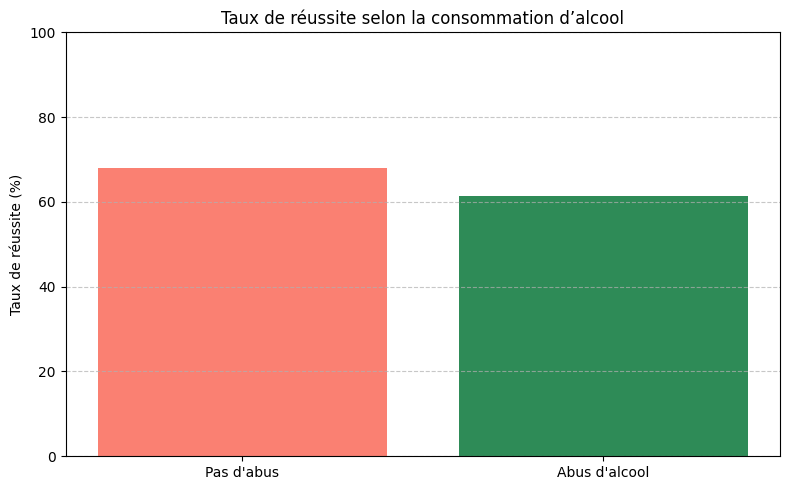

In [181]:
# Créer une colonne de consommation moyenne
df['alcool_moyenne'] = (df['Dalc'] + df['Walc']) / 2

# Définir les groupes : abus ou non
df['abus_alcool'] = df['alcool_moyenne'] > 2.5

# Définir réussite (G3 >= 10)
df['reussite'] = df['G3'] >= 10

# Calcul du taux de réussite par groupe
taux_reussite = df.groupby('abus_alcool')['reussite'].mean().reset_index()
taux_reussite['abus_alcool'] = taux_reussite['abus_alcool'].map({True: 'Abus d\'alcool', False: 'Pas d\'abus'})

# Tracer un graphique
plt.figure(figsize=(8,5))
plt.bar(taux_reussite['abus_alcool'], taux_reussite['reussite'] * 100, color=['salmon', 'seagreen'])
plt.title("Taux de réussite selon la consommation d’alcool")
plt.ylabel("Taux de réussite (%)")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3.	Est-ce que la proportion de garçons qui abusent d’alcool est significativement supérieure à celle des  filles ?

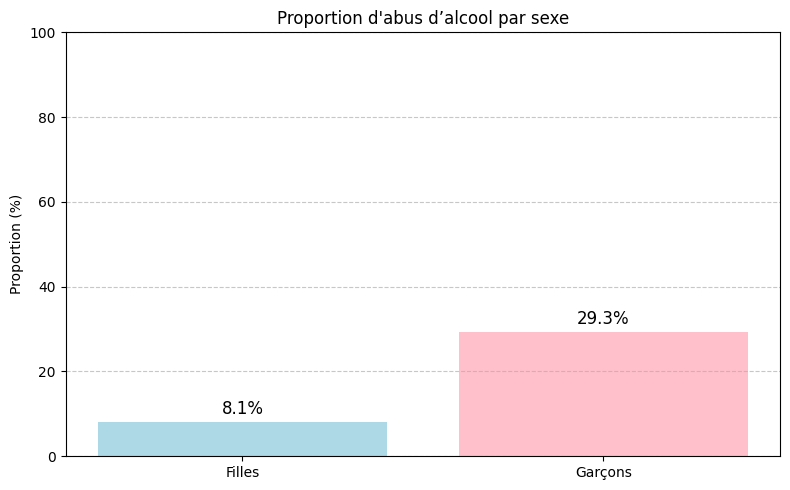

Table de contingence :
 abus_alcool  False  True 
sex                      
F              182     16
M              130     54

Test du chi² : p-value = 0.0000
✅ Différence significative : les garçons abusent plus que les filles.


In [182]:
from scipy import stats


# Nettoyage : mise en majuscule des valeurs dans la colonne 'sex'
df['sex'] = df['sex'].str.upper()

# Calcul de la consommation moyenne
df['alcool_moyenne'] = (df['Dalc'] + df['Walc']) / 2

# Définir l'abus d'alcool
df['abus_alcool'] = df['alcool_moyenne'] > 2.5

# Proportions par sexe
proportions = df.groupby('sex')['abus_alcool'].mean().reset_index()
proportions['sex'] = proportions['sex'].map({'M': 'Garçons', 'F': 'Filles'})

# Affichage graphique
plt.figure(figsize=(8, 5))
bars = plt.bar(proportions['sex'], proportions['abus_alcool'] * 100, color=['lightblue', 'pink'])

# Ajouter les pourcentages au-dessus des barres
for bar, value in zip(bars, proportions['abus_alcool']):
    plt.text(bar.get_x() + bar.get_width()/2, value * 100 + 1, f"{value * 100:.1f}%", 
             ha='center', va='bottom', fontsize=12)

plt.title("Proportion d'abus d’alcool par sexe")
plt.ylabel("Proportion (%)")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Test du chi²
contingency_table = pd.crosstab(df['sex'], df['abus_alcool'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Résultat du test
print("Table de contingence :\n", contingency_table)
print(f"\nTest du chi² : p-value = {p:.4f}")
if p < 0.05:
    print("✅ Différence significative : les garçons abusent plus que les filles.")
else:
    print("❌ Pas de différence significative.")

4.	La consommation d'alcool pendant le week-end est-elle significativement plus élevée que pendant la semaine?

Consommation moyenne pendant la semaine (Dalc) : 1.47
Consommation moyenne le week-end (Walc) : 2.28

Test t : p-value = 0.0000
✅ Différence significative : la consommation est plus élevée le week-end.


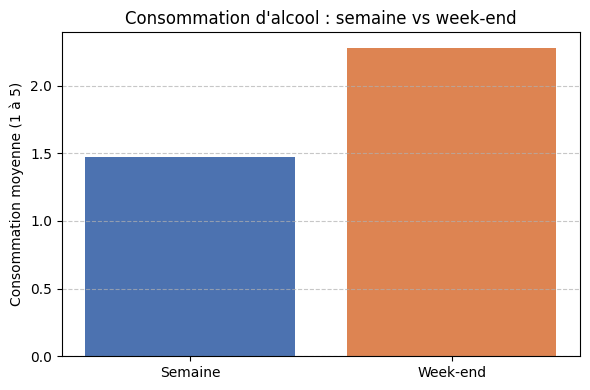

In [183]:

# Moyennes
dalc_mean = df['Dalc'].mean()
walc_mean = df['Walc'].mean()

print(f"Consommation moyenne pendant la semaine (Dalc) : {dalc_mean:.2f}")
print(f"Consommation moyenne le week-end (Walc) : {walc_mean:.2f}")

# Test t de Student pour échantillons appariés
t_stat, p_value = stats.ttest_rel(df['Walc'], df['Dalc'])

print(f"\nTest t : p-value = {p_value:.4f}")
if p_value < 0.05:
    print("✅ Différence significative : la consommation est plus élevée le week-end.")
else:
    print("❌ Pas de différence significative entre semaine et week-end.")

# Visualisation
plt.figure(figsize=(6, 4))
plt.bar(['Semaine', 'Week-end'], [dalc_mean, walc_mean], color=['#4C72B0', '#DD8452'])
plt.ylabel("Consommation moyenne (1 à 5)")
plt.title("Consommation d'alcool : semaine vs week-end")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


5.	Les étudiants vivant en milieu urbain consomment-ils moins d'alcool que ceux vivant en milieu rural?

Consommation moyenne en milieu urbain : 1.82
Consommation moyenne en milieu rural : 2.09

Test t : p-value = 0.0377
✅ Différence significative : le type d'habitat influence la consommation.


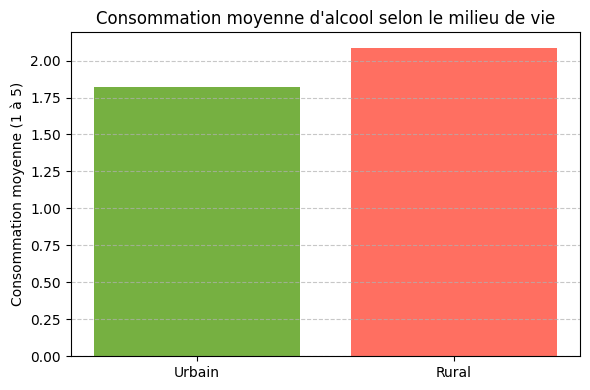

In [184]:

# Conversion des colonnes alcool en numérique
df['Dalc'] = pd.to_numeric(df['Dalc'], errors='coerce')
df['Walc'] = pd.to_numeric(df['Walc'], errors='coerce')

# Nettoyer la colonne 'address' (juste au cas où)
df['address'] = df['address'].str.strip().str.upper()

# Supprimer les lignes avec valeurs manquantes dans Dalc, Walc ou address
df_clean = df.dropna(subset=['Dalc', 'Walc', 'address'])

# Créer la colonne de consommation moyenne
df_clean['alcool_moyenne'] = (df_clean['Dalc'] + df_clean['Walc']) / 2

# Moyennes par milieu
urban_mean = df_clean[df_clean['address'] == 'U']['alcool_moyenne'].mean()
rural_mean = df_clean[df_clean['address'] == 'R']['alcool_moyenne'].mean()

print(f"Consommation moyenne en milieu urbain : {urban_mean:.2f}")
print(f"Consommation moyenne en milieu rural : {rural_mean:.2f}")

# Test t de Student
t_stat, p_value = stats.ttest_ind(
    df_clean[df_clean['address'] == 'U']['alcool_moyenne'],
    df_clean[df_clean['address'] == 'R']['alcool_moyenne'],
    equal_var=False
)

print(f"\nTest t : p-value = {p_value:.4f}")
if p_value < 0.05:
    print("✅ Différence significative : le type d'habitat influence la consommation.")
else:
    print("❌ Pas de différence significative entre urbain et rural.")

# Visualisation
plt.figure(figsize=(6, 4))
plt.bar(['Urbain', 'Rural'], [urban_mean, rural_mean], color=['#76B041', '#FF6F61'])
plt.ylabel("Consommation moyenne (1 à 5)")
plt.title("Consommation moyenne d'alcool selon le milieu de vie")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

6.	La consommation d'alcool est-elle liée au nombre d'absences scolaires ?

Corrélation : 0.2023
✅ Corrélation significative : la consommation d'alcool est liée aux absences scolaires.


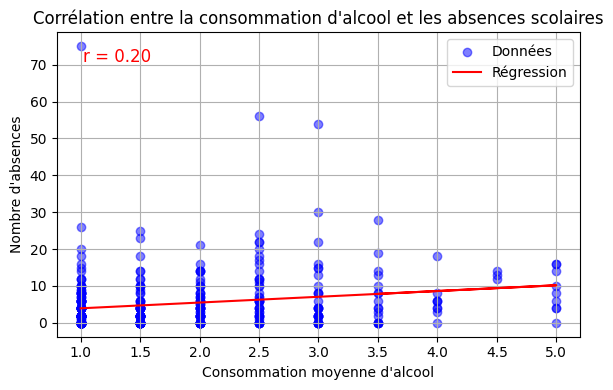

In [185]:
# Calcul manuel de la corrélation de Pearson
x = df_clean['alcool_moyenne']
y = df_clean['absences']
mean_x = x.mean()
mean_y = y.mean()
cov = ((x - mean_x) * (y - mean_y)).sum() / (len(x) - 1)
std_x = x.std(ddof=1)
std_y = y.std(ddof=1)
corr = cov / (std_x * std_y)
# Test de significativité (approximation) : |r| > 2/sqrt(n) pour n>30
n = len(x)
print(f"Corrélation : {corr:.4f}")
if abs(corr) > 2/(n**0.5):
    print("✅ Corrélation significative : la consommation d'alcool est liée aux absences scolaires.")
else:
    print("❌ Pas de corrélation significative entre la consommation d'alcool et les absences scolaires.")

# Visualisation avec droite de régression
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='b', alpha=0.5, label='Données')
# Droite de régression
slope = cov / (std_x**2)
intercept = mean_y - slope * mean_x
plt.plot(x, slope * x + intercept, color='red', label='Régression')
plt.title("Corrélation entre la consommation d'alcool et les absences scolaires")
plt.xlabel("Consommation moyenne d'alcool")
plt.ylabel("Nombre d'absences")
plt.grid(True)
plt.legend()
plt.annotate(f"r = {corr:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top', color='red')
plt.tight_layout()
plt.show()

In [186]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import plotly.io as pio

import plotly.io as pio
pio.renderers.default = 'browser'


# Données
x1 = df_clean['alcool_moyenne'].values
x2 = df_clean['G3'].values
y = df_clean['absences'].values

# Modèle de régression
X = np.column_stack((x1, x2))
model = LinearRegression().fit(X, y)

# Grille pour surface de régression
x1_range = np.linspace(x1.min(), x1.max(), 30)
x2_range = np.linspace(x2.min(), x2.max(), 30)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
X_pred = np.column_stack((x1_grid.ravel(), x2_grid.ravel()))
y_pred = model.predict(X_pred).reshape(x1_grid.shape)

# Graphique interactif 3D
fig = go.Figure()

# Nuage de points
fig.add_trace(go.Scatter3d(
    x=x1, y=x2, z=y,
    mode='markers',
    marker=dict(size=5, color=y, colorscale='Viridis', opacity=0.8, colorbar=dict(title='Absences')),
    name='Données réelles'
))

# Surface de régression
fig.add_trace(go.Surface(
    x=x1_range, y=x2_range, z=y_pred,
    colorscale='Reds',
    opacity=0.5,
    name='Plan de régression'
))

# Mise en page
fig.update_layout(
    title='Corrélation 3D : absences ~ alcool + note finale (G3)',
    scene=dict(
        xaxis_title='Consommation moyenne d\'alcool',
        yaxis_title='Note finale (G3)',
        zaxis_title='Nombre d\'absences'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


 ### Standardisation des valeurs catégorielles


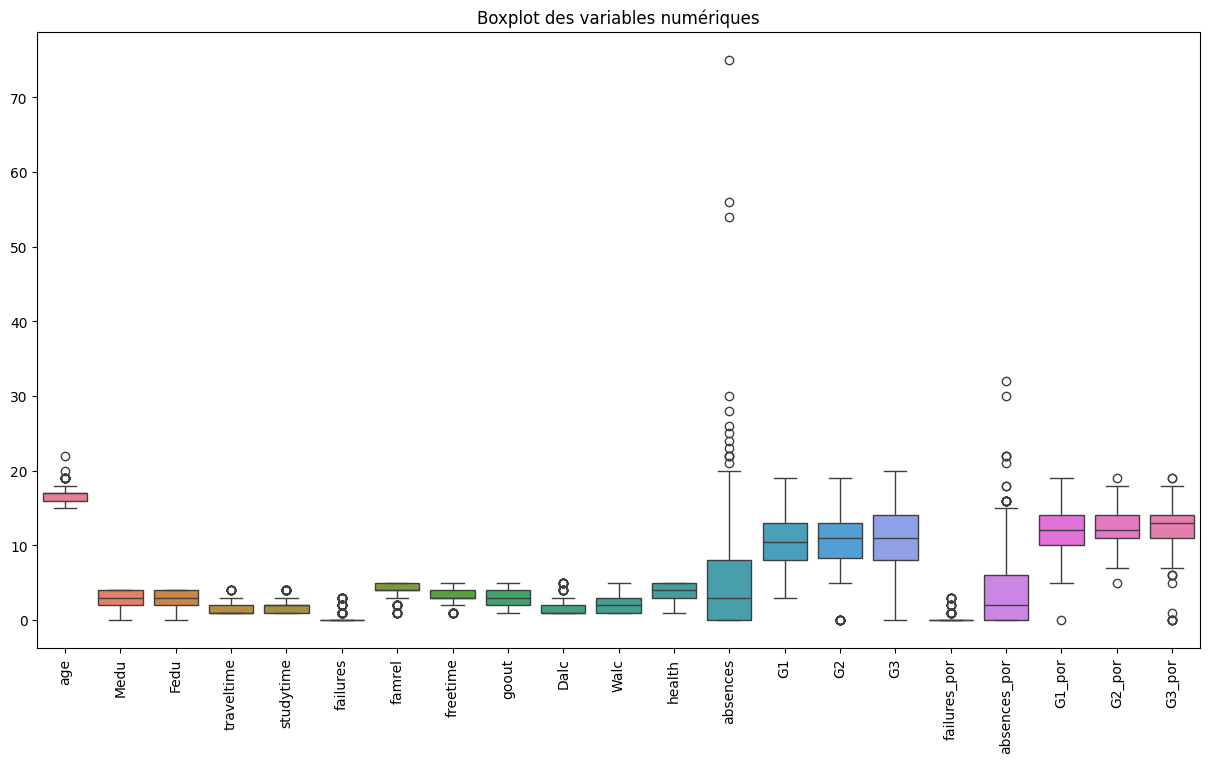

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplot des variables numériques")
plt.show()

Taille originale du dataframe: 382
Taille après suppression des outliers: 203
Nombre d'outliers supprimés: 179
Taille originale du dataframe: 382
Taille après suppression des outliers: 175
Nombre d'outliers supprimés: 207


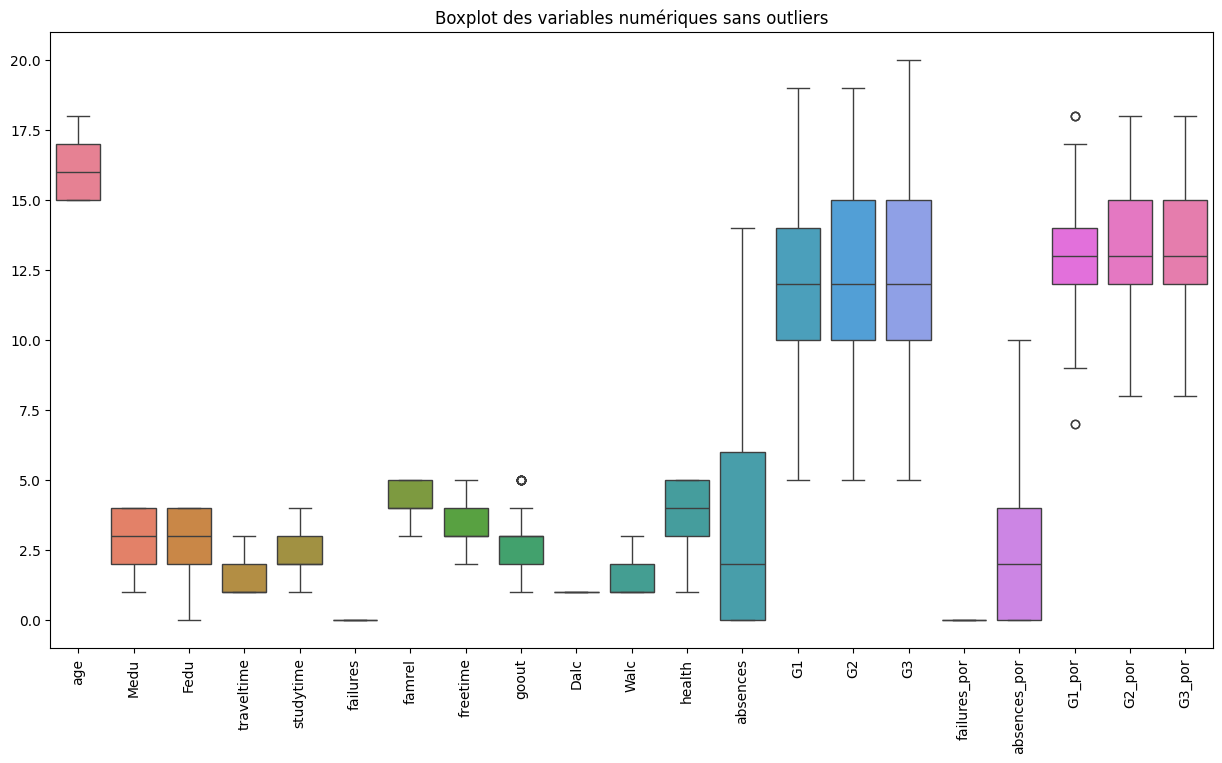

In [188]:
def remove_outliers(df, columns=None):
    """
    Élimine les outliers du dataframe pour les colonnes spécifiées en utilisant la méthode IQR.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Le dataframe contenant les données
    columns : list, optional
        Liste des colonnes pour lesquelles éliminer les outliers. 
        Si None, toutes les colonnes numériques sont utilisées.
        
    Returns:
    --------
    pandas.DataFrame
        Un nouveau dataframe sans les outliers
    """
    if columns is None:
        # Utiliser uniquement les colonnes numériques
        columns = df.select_dtypes(include=['float', 'int']).columns
    
    df_clean = df.copy()
    
    for col in columns:
        # Calculer Q1 (25e percentile) et Q3 (75e percentile)
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        
        # Calculer l'IQR (écart interquartile)
        IQR = Q3 - Q1
        
        # Définir les limites pour les outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtrer le dataframe
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    print(f"Taille originale du dataframe: {len(df)}")
    print(f"Taille après suppression des outliers: {len(df_clean)}")
    print(f"Nombre d'outliers supprimés: {len(df) - len(df_clean)}")
    
    return df_clean

# Pour éliminer les outliers de toutes les colonnes numériques
df_no_outliers = remove_outliers(df)

# Pour éliminer les outliers de colonnes spécifiques
columns_to_clean = ['age','failures','traveltime','studytime','absences', 'G1', 'G2', 'G3', 'G1_por', 'G2_por', 'G3_por','famrel','freetime','Dalc','absences','failures_por','absences_por','alcool_moyenne']
df_no_outliers = remove_outliers(df, columns=columns_to_clean)

# Visualiser les données sans outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_no_outliers[numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplot des variables numériques sans outliers")
plt.show()

In [189]:
### 🔹 Normalisation (Min-Max)
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Créer des scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Liste des colonnes numériques (basée sur le boxplot)
numerical_cols = ['G1','G2','G3']

# Appliquer MinMaxScaler à toutes les colonnes numériques
for col in numerical_cols:
    # Créer une nouvelle colonne avec le suffixe _norm
    df[f'{col}_norm'] = min_max_scaler.fit_transform(df[[col]])

# Appliquer StandardScaler à toutes les colonnes numériques
for col in numerical_cols:
    # Créer une nouvelle colonne avec le suffixe _std
    df[f'{col}_std'] = standard_scaler.fit_transform(df[[col]])

# Afficher les premières lignes pour vérifier
print(df.head())

# Pour voir toutes les colonnes créées
normalized_cols = [col + '_norm' for col in numerical_cols]
standardized_cols = [col + '_std' for col in numerical_cols]

# Vérifier les statistiques descriptives des colonnes normalisées
print("\nStatistiques des colonnes normalisées:")
print(df[normalized_cols].describe().T)

# Vérifier les statistiques descriptives des colonnes standardisées
print("\nStatistiques des colonnes standardisées:")
print(df[standardized_cols].describe().T)

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     gp   F   18       U     gt3       a     4     4  at_home   teacher  ...   
1     gp   F   17       U     gt3       t     1     1  at_home     other  ...   
2     gp   F   15       U     le3       t     1     1  at_home     other  ...   
3     gp   F   15       U     gt3       t     4     2   health  services  ...   
4     gp   F   16       U     gt3       t     3     3    other     other  ...   

  instruction_modeste alcool_moyenne  abus_alcool  reussite  G1_norm  \
0               False            1.0        False     False   0.1250   
1                True            1.0        False     False   0.1250   
2                True            2.5        False      True   0.2500   
3               False            1.0        False      True   0.7500   
4               False            1.5        False      True   0.1875   

    G2_norm G3_norm    G1_std    G2_std    G3_std  
0  0.315789    0.30 -1.75235

In [190]:
from sklearn.preprocessing import LabelEncoder

# Charger les données (ajuster selon la façon dont tu charges ton DataFrame)
# df = pd.read_csv("ton_fichier.csv", sep=';')

# 🔹 Label Encoding (pour les colonnes avec des valeurs catégorielles)
le = LabelEncoder()

# Exemple d'encodage de la colonne 'sex'
df['sex_enc'] = le.fit_transform(df['sex'])

# Exemple d'encodage de la colonne 'address' (urbain / rural)
df['address_enc'] = le.fit_transform(df['address'])

# Exemple d'encodage de la colonne 'famsize' (GT3 / LE3)
df['famsize_enc'] = le.fit_transform(df['famsize'])

# Exemple d'encodage de la colonne 'Pstatus' (A / T)
df['Pstatus_enc'] = le.fit_transform(df['Pstatus'])

# Exemple d'encodage de la colonne 'Mjob' (at_home, teacher, etc.)
df['Mjob_enc'] = le.fit_transform(df['Mjob'])

# Exemple d'encodage de la colonne 'Fjob' (teacher, services, etc.)
df['Fjob_enc'] = le.fit_transform(df['Fjob'])

# Exemple d'encodage de la colonne 'reason' (course, home, etc.)
df['reason_enc'] = le.fit_transform(df['reason'])

# Exemple d'encodage de la colonne 'guardian' (mother, father, etc.)
df['guardian_enc'] = le.fit_transform(df['guardian'])

# 🔹 One-Hot Encoding (pour les colonnes avec plusieurs catégories)
df = pd.get_dummies(df, columns=['Mjob', 'Fjob', 'reason', 'guardian'], drop_first=True)


In [191]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother
0,gp,F,18,U,gt3,a,4,4,2,2,...,False,False,False,False,False,True,False,False,False,True
1,gp,F,17,U,gt3,t,1,1,1,2,...,False,False,False,True,False,False,False,False,False,False
2,gp,F,15,U,le3,t,1,1,1,2,...,False,False,False,True,False,False,False,True,False,True
3,gp,F,15,U,gt3,t,4,2,1,3,...,False,False,False,False,True,False,True,False,False,True
4,gp,F,16,U,gt3,t,3,3,1,2,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,ms,F,18,U,le3,t,3,1,1,2,...,False,True,False,False,True,False,False,False,False,True
378,ms,F,18,U,gt3,t,1,1,2,2,...,False,False,False,True,False,False,False,False,False,True
379,ms,F,18,U,gt3,t,1,1,2,2,...,False,False,False,True,False,False,False,False,False,True
380,ms,M,17,U,le3,t,3,1,2,1,...,True,False,False,False,True,False,False,False,False,True


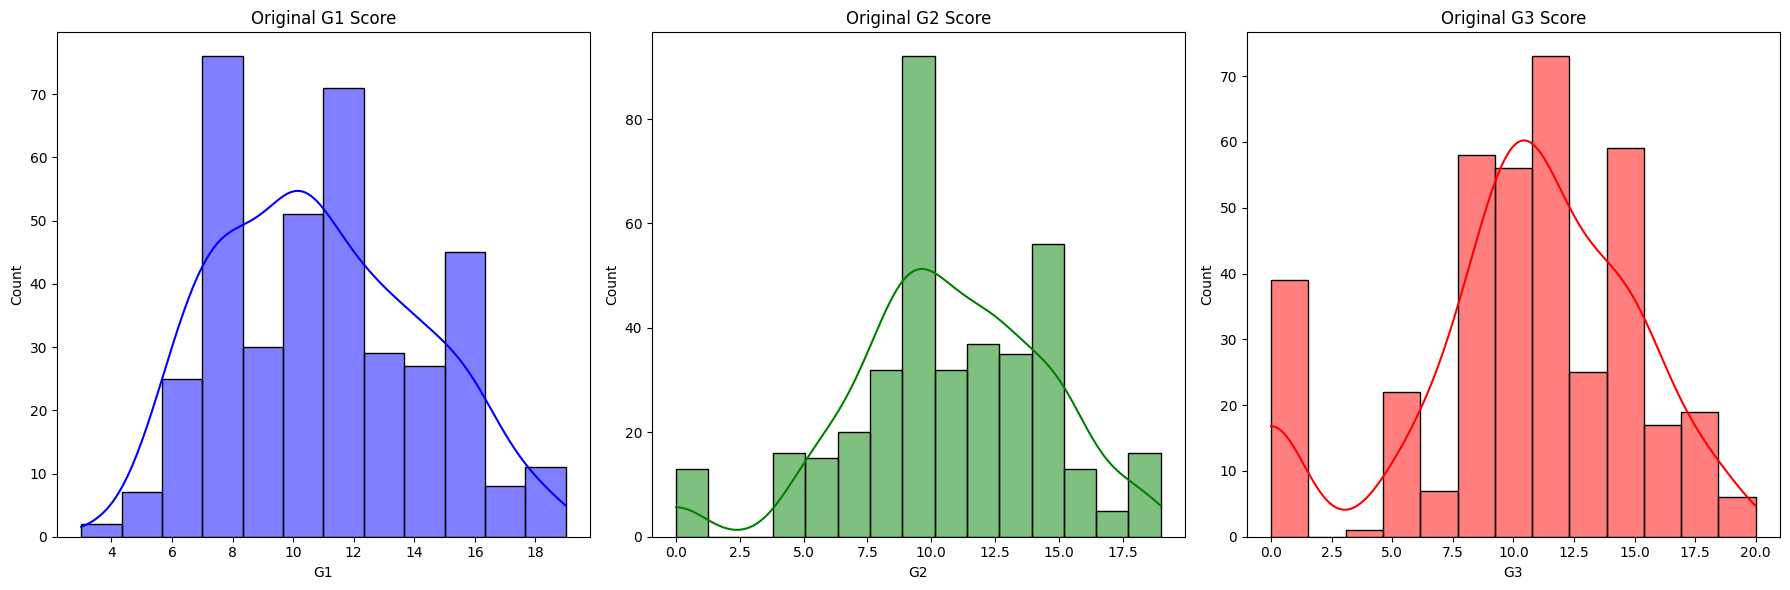

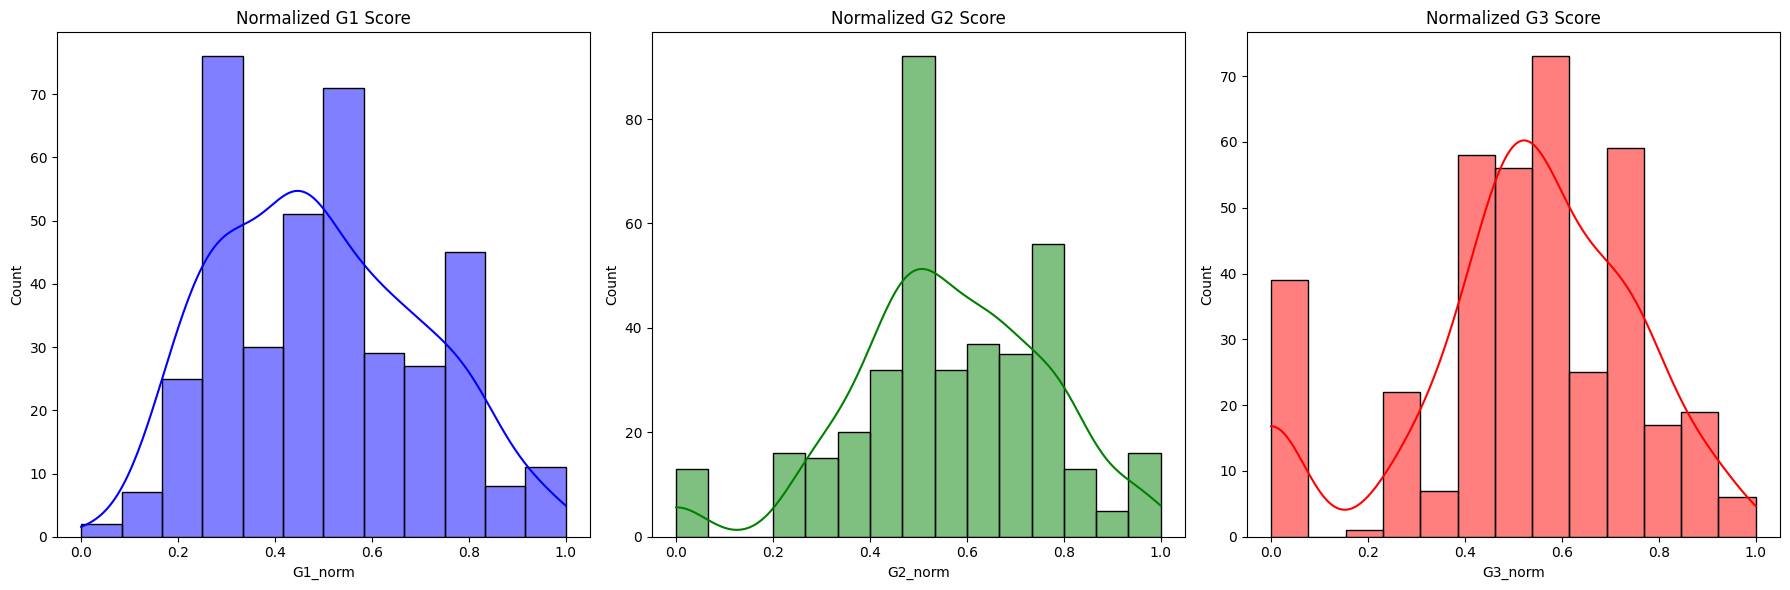

In [192]:
## Partie 5 : Visualisation et Comparaison

### 🔹 Visualisation des effets de la transformation

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Histograms des scores originaux
sns.histplot(df['G1'], ax=axs[0], kde=True, color='blue')
axs[0].set_title('Original G1 Score')

sns.histplot(df['G2'], ax=axs[1], kde=True, color='green')
axs[1].set_title('Original G2 Score')

sns.histplot(df['G3'], ax=axs[2], kde=True, color='red')
axs[2].set_title('Original G3 Score')

plt.tight_layout()
plt.show()

# Visualisation des scores normalisés
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Histogrammes des scores normalisés
sns.histplot(df['G1_norm'], ax=axs[0], kde=True, color='blue')
axs[0].set_title('Normalized G1 Score')

sns.histplot(df['G2_norm'], ax=axs[1], kde=True, color='green')
axs[1].set_title('Normalized G2 Score')

sns.histplot(df['G3_norm'], ax=axs[2], kde=True, color='red')
axs[2].set_title('Normalized G3 Score')

plt.tight_layout()
plt.show()